In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
!dir

 Volume in drive E is SSD volume
 Volume Serial Number is FA50-0540

 Directory of E:\ImportantDocBackup\UOM Assignments\Semester 4\machine_vision\Assignment_1

02/20/2022  12:15 PM    <DIR>          .
02/20/2022  12:15 PM    <DIR>          ..
02/20/2022  11:53 AM    <DIR>          .ipynb_checkpoints
02/20/2022  12:14 PM    <DIR>          a1q5images
02/20/2022  11:53 AM               577 Book1.ipynb
02/20/2022  12:14 PM            34,597 brain_proton_density_slice.png
02/20/2022  12:14 PM            91,174 daisy.jpg
02/20/2022  12:14 PM           111,634 einstein.png
02/20/2022  12:14 PM            86,276 emma_gray.jpg
02/20/2022  12:14 PM            66,738 highlights_and_shadows.jpg
02/20/2022  12:14 PM           106,774 shells.png
               7 File(s)        497,770 bytes
               4 Dir(s)  173,693,497,344 bytes free


In [5]:
!dir a1q5images

 Volume in drive E is SSD volume
 Volume Serial Number is FA50-0540

 Directory of E:\ImportantDocBackup\UOM Assignments\Semester 4\machine_vision\Assignment_1\a1q5images

02/20/2022  12:14 PM    <DIR>          .
02/20/2022  12:14 PM    <DIR>          ..
10/13/2016  08:38 AM         2,823,360 im01.png
10/13/2016  08:38 AM           246,121 im01small.png
10/13/2016  08:38 AM         2,040,813 im02.png
10/13/2016  08:38 AM           194,390 im02small.png
10/13/2016  08:38 AM         3,410,482 im03.png
10/13/2016  08:38 AM           342,597 im03small.png
               6 File(s)      9,057,763 bytes
               2 Dir(s)  173,693,493,248 bytes free


# Assignment 1

## Question 1

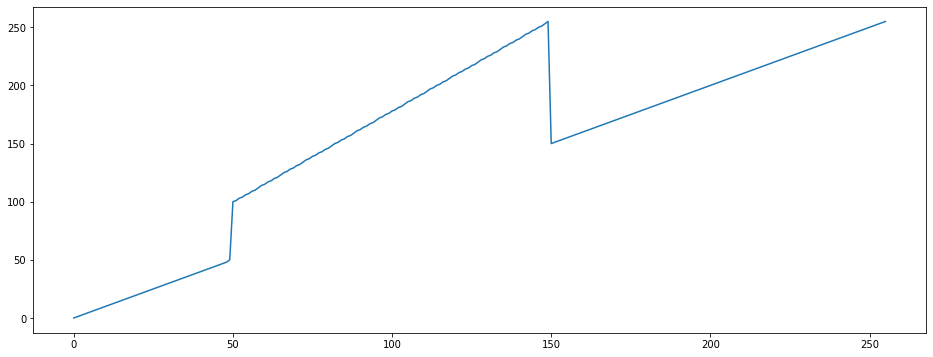

In [56]:
# creating intensity transformation
t1 = np.linspace(0, 50, 50)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 106)

transform = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)
assert len(transform) == 256

_, ax = plt.subplots(figsize = (16, 6))
ax.plot(transform)
plt.show()

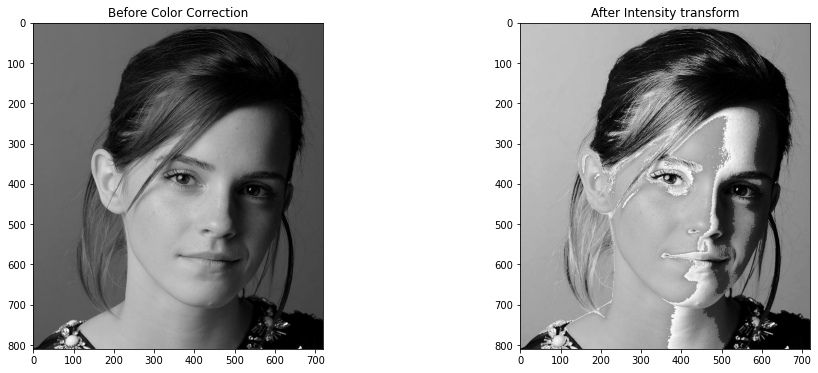

In [57]:
img = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None

# do color correction
img_corr = cv.LUT(img, transform)

# do color convertion
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_corr = cv.cvtColor(img_corr, cv.COLOR_BGR2RGB)

_, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].set_title("Before Color Correction")
ax[0].imshow(img)

ax[1].set_title("After Intensity transform")
ax[1].imshow(img_corr)

plt.show()

## Question 2

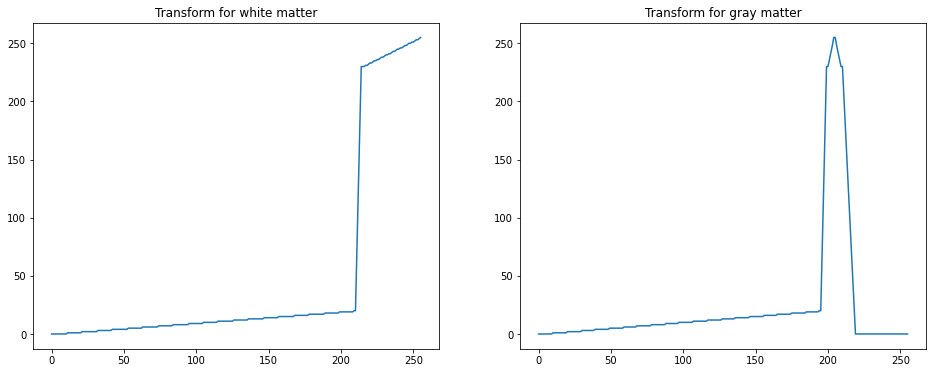

In [106]:
# creating trasnform
t11 = np.linspace(0, 20, 210)
t12 = np.linspace(20, 230, 5)
t13 = np.linspace(230, 255, 41)

transform1 = np.concatenate((t11, t12, t13), axis = 0).astype(np.uint8)

t21 = np.linspace(0, 20, 195)
t22 = np.linspace(20, 230, 5) # 200
t23 = np.linspace(230, 255,5) # 205
t24 = np.linspace(255, 230, 5) # 210
t25 = np.linspace(230, 0, 10)
t26 = np.linspace(0,0, 36)

transform2 = np.concatenate((t21, t22, t23, t24, t25, t26), axis = 0).astype(np.uint8)
assert len(transform1) == 256 and len(transform2) == 256

_, ax = plt.subplots(1,2, figsize = (16, 6))
ax[0].set_title("Transform for white matter")
ax[0].plot(transform1)
ax[1].set_title("Transform for gray matter")
ax[1].plot(transform2)
plt.show()

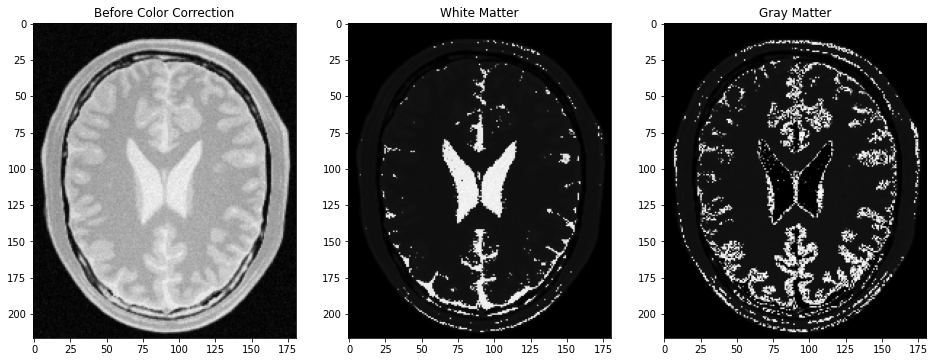

In [107]:
img = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img is not None

# do color correction
img_white = cv.LUT(img, transform1)



img_gray = cv.LUT(img, transform2)

# do color convertion
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_white = cv.cvtColor(img_white, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_gray, cv.COLOR_BGR2RGB)

_, ax = plt.subplots(1, 3, figsize=(16, 6))

ax[0].set_title("Before Color Correction")
ax[0].imshow(img)

ax[1].set_title("White Matter")
ax[1].imshow(img_white)

ax[2].set_title("Gray Matter")
ax[2].imshow(img_gray)

plt.show()